In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# 1. 지하철 승하차 인원

In [38]:
# 수집데이터 불러오기(지하철 승하차 인원)
# subway_2016_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/passenger_data(2016-2020)/Seoul_subway_passenger_data3(2015-2022)/서울교통공사 2016년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
# subway_2017_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/passenger_data(2016-2020)/Seoul_subway_passenger_data3(2015-2022)/서울교통공사 2017년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
# subway_2018_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/passenger_data(2016-2020)/Seoul_subway_passenger_data3(2015-2022)/서울교통공사 2018년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
# subway_2019_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/passenger_data(2016-2020)/Seoul_subway_passenger_data3(2015-2022)/서울교통공사 2019년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
subway_2020_list = pd.read_csv('E:/Git/data/Academy_Second_Project/passenger_data(2016-2020)/서울교통공사 2020년 일별 역별 시간대별 승하차인원(1_8호선).csv', encoding = 'cp949')

# 깃허브 README에서 지하철 승하차인원 데이터 공유 주소 확인
# 데이터 볼륨을 줄인 상태에서 코드 작성 -> 추후 2016~2020 데이터 모두 사용

In [39]:
subway_2020_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202280 entries, 0 to 202279
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   날짜             202280 non-null  object
 1   호선             202280 non-null  object
 2   역번호            202280 non-null  int64 
 3   역명             202280 non-null  object
 4   구분             202280 non-null  object
 5   06:00 이전       202280 non-null  int64 
 6   06:00 ~ 07:00  202280 non-null  int64 
 7   07:00 ~ 08:00  202280 non-null  int64 
 8   08:00 ~ 09:00  202280 non-null  int64 
 9   09:00 ~ 10:00  202280 non-null  int64 
 10  10:00 ~ 11:00  202280 non-null  int64 
 11  11:00 ~ 12:00  202280 non-null  int64 
 12  12:00 ~ 13:00  202280 non-null  int64 
 13  13:00 ~ 14:00  202280 non-null  int64 
 14  14:00 ~ 15:00  202280 non-null  int64 
 15  15:00 ~ 16:00  202280 non-null  int64 
 16  16:00 ~ 17:00  202280 non-null  int64 
 17  17:00 ~ 18:00  202280 non-null  int64 
 18  18:0

In [40]:
# 2호선 / 승차인원 (row data 볼륨을 줄이기 위해 조건 설정)
sub_2020_edit1 = subway_2020_list[(subway_2020_list['호선'] == '2호선') & (subway_2020_list['구분'] == '승차')]

# 1차 가공 데이터 (2호선/승차인원)
sub_2020_edit1

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
20,2020-01-01,2호선,201,시청,승차,46,73,75,99,187,...,703,758,892,913,776,773,649,466,153,0
22,2020-01-01,2호선,202,을지로입구,승차,128,119,108,216,355,...,2128,2568,2899,3215,2781,3380,2706,1887,845,11
24,2020-01-01,2호선,203,을지로3가,승차,60,87,119,127,195,...,557,645,793,728,542,556,493,379,157,0
26,2020-01-01,2호선,204,을지로4가,승차,36,50,66,107,174,...,391,416,323,275,220,195,133,95,57,2
28,2020-01-01,2호선,205,동대문역사문화공원(DDP),승차,399,237,160,273,361,...,922,1032,1097,976,1291,1111,865,927,374,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201836,2020-12-31,2호선,246,신설동,승차,22,38,77,168,100,...,262,267,324,324,127,85,50,24,10,0
201838,2020-12-31,2호선,247,도림천,승차,10,26,70,163,91,...,91,113,116,89,57,36,25,10,3,3
201840,2020-12-31,2호선,248,양천구청,승차,118,281,877,800,375,...,239,218,231,246,94,63,62,39,19,3
201842,2020-12-31,2호선,249,신정네거리,승차,213,364,1265,1178,535,...,378,383,338,328,203,152,128,50,9,2


In [42]:
# 2차 가공데이터 (시간별 승차인원 데이터로 형태 변경)
sub_2020_edit2 = pd.DataFrame()

# 시간별 승차인원 데이터
for i in range(len(sub_2020_edit1)) :
  a = sub_2020_edit1.iloc[i]
  a = pd.DataFrame(a)
  a = a.transpose()
  b = pd.melt(a, id_vars=['날짜','호선','역명','역번호','구분'])
  sub_2020_edit2 = sub_2020_edit2.append(b)

sub_2020_edit2.head()

,날짜,호선,역명,역번호,구분,variable,value
0,2020-01-01,2호선,시청,201,승차,06:00 이전,46
1,2020-01-01,2호선,시청,201,승차,06:00 ~ 07:00,73
2,2020-01-01,2호선,시청,201,승차,07:00 ~ 08:00,75
3,2020-01-01,2호선,시청,201,승차,08:00 ~ 09:00,99
4,2020-01-01,2호선,시청,201,승차,09:00 ~ 10:00,187


In [43]:
# 2차 가공 데이터 확인
print(sub_2020_edit2.shape)
print("--------------------------------------")
sub_2020_edit2.info()

(366000, 7)
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366000 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   날짜        366000 non-null  object
 1   호선        366000 non-null  object
 2   역명        366000 non-null  object
 3   역번호       366000 non-null  object
 4   구분        366000 non-null  object
 5   variable  366000 non-null  object
 6   value     366000 non-null  object
dtypes: object(7)
memory usage: 22.3+ MB


In [48]:
sub_2020_edit2['역명'].value_counts()

시청                     7320
신정네거리                  7320
을지로입구                  7320
서울대입구(관악구청)            7320
봉천                     7320
신림                     7320
신대방                    7320
구로디지털단지                7320
대림(구로구청)               7320
신도림                    7320
문래                     7320
영등포구청                  7320
당산                     7320
합정                     7320
홍대입구                   7320
신촌                     7320
이대                     7320
아현                     7320
충정로(경기대입구)             7320
용답                     7320
신답                     7320
신설동                    7320
도림천                    7320
사당                     7320
방배                     7320
서초                     7320
건대입구                   7320
을지로3가                  7320
을지로4가                  7320
용두(동대문구청)              7320
신당                     7320
상왕십리                   7320
왕십리(성동구청)              7320
한양대                    7320
뚝섬                     7320
성수                  

In [44]:
# 각 지하철열 위치 정보 (수집데이터 기준 : 일시(날짜+시간), 위치)
sub_location = {'까치산':'강서구','신정네거리':'양천구','양천구청':'양천구',
                '도림천':'구로구','신도림':'구로구','구로디지털단지':'구로구',
                '대림':'구로구','대림(구로구청)':'구로구','문래':'영등포구','영등포구청':'영등포구',
                '당산':'영등포구','합정':'마포구','홍대입구':'마포구',
                '이대':'마포구','아현':'마포구','신촌':'서대문구',
                '충정로':'서대문구','충정로(경기대입구)':'서대문구','시청':'중구','을지로입구':'중구',
                '을지로3가':'중구','을지로4가':'중구','동대문역사문화공원':'중구','동대문역사문화공원(DDP)':'중구', '동대문역사문화공원(DDP)(DDP)':'중구',
                '신당':'중구','상왕십리':'성동구','왕십리':'성동구','왕십리(성동구청)':'성동구',
                '한양대':'성동구','뚝섬':'성동구','성수':'성동구','성수지선':'성동구',
                '용답':'성동구','신답':'성동구','용두':'동대문구','용두(동대문구청)':'동대문구',
                '신설동':'동대문구','건대입구':'광진구','구의':'광진구','구의(광진구청)':'광진구',
                '강변':'광진구','강변(동서울터미널)':'광진구','잠실나루':'송파구','잠실':'송파구','잠실(송파구청)':'송파구',
                '잠실새내':'송파구','종합운동장':'송파구','삼성':'강남구','삼성(무역센터)':'강남구',
                '선릉':'강남구','역삼':'강남구','강남':'강남구',
                '교대':'서초구','교대(법원.검찰청)':'서초구','방배':'서초구','서초':'서초구','사당':'동작구',
                '낙성대':'관악구','낙성대(강감찬)':'관악구','서울대입구':'관악구','서울대입구(관악구청)':'관악구','봉천':'관악구',
                '신림':'관악구','신대방':'관악구'}

In [8]:
# 2차 가공 데이터에 위치 정보 생성
location = []
for i in sub_2020_edit2['역명'] :
  location.append(sub_location[i])
sub_2020_edit2['위치'] = location

In [9]:
# 2차 가공 데이터 확인
sub_2020_edit2

,날짜,호선,역명,역번호,구분,variable,value,위치
0,2020-01-01,2호선,시청,201,승차,06:00 이전,46,중구
1,2020-01-01,2호선,시청,201,승차,06:00 ~ 07:00,73,중구
2,2020-01-01,2호선,시청,201,승차,07:00 ~ 08:00,75,중구
3,2020-01-01,2호선,시청,201,승차,08:00 ~ 09:00,99,중구
4,2020-01-01,2호선,시청,201,승차,09:00 ~ 10:00,187,중구
...,...,...,...,...,...,...,...,...
15,2020-12-31,2호선,용두(동대문구청),250,승차,20:00 ~ 21:00,43,동대문구
16,2020-12-31,2호선,용두(동대문구청),250,승차,21:00 ~ 22:00,33,동대문구
17,2020-12-31,2호선,용두(동대문구청),250,승차,22:00 ~ 23:00,13,동대문구
18,2020-12-31,2호선,용두(동대문구청),250,승차,23:00 ~ 24:00,3,동대문구


In [19]:
# 3차 가공 데이터 (Column 편집)
sub_2020_edit3 = sub_2020_edit2[['날짜','variable','호선','위치','역명','value']]  # 추후 위치 추가
sub_2020_edit3 = sub_2020_edit3.rename(columns = {'날짜' : 'Date',
                                                  'variable' : 'Time', 
                                                  '호선' : 'Line', 
                                                  '위치' : 'Location', 
                                                  '역명' : 'Sub_station', 
                                                  'value' : 'Passenger_num'})
sub_2020_edit3 = sub_2020_edit3.reset_index(drop=True)

sub_2020_edit3.head(2)

,Date,Time,Line,Location,Sub_station,Passenger_num
0,2020-01-01,06:00 이전,2호선,중구,시청,46
1,2020-01-01,06:00 ~ 07:00,2호선,중구,시청,73


In [21]:
# 4차 가공 데이터
sub_2020_edit4 = sub_2020_edit3

# 첫 행 시간 데이터 변경
sub_2020_edit4['Time'][0] = sub_2020_edit4['Time'][0].replace(sub_2020_edit4['Time'][0], '05:00')

for i in range(len(sub_2020_edit4['Time'])) :
  if i == 0 : # 첫 행 건너뛰기
    continue
  elif i%20 == 0 :
    sub_2020_edit4['Time'][i] = sub_2020_edit4['Time'][i].replace(sub_2020_edit4['Time'][i], '05:00')
  elif sub_2020_edit4['Time'][i] == '24:00 이후' :
    sub_2020_edit4['Time'][i] = sub_2020_edit4['Time'][i].replace(sub_2020_edit4['Time'][i], '00:00')
  else :
    sub_2020_edit4['Time'][i] = sub_2020_edit4['Time'][i].replace(sub_2020_edit4['Time'][i], sub_2020_edit4['Time'][i][0:5])

sub_2020_edit4

,Date,Time,Line,Location,Sub_station,Passenger_num
0,2020-01-01,05:00,2호선,중구,시청,46
1,2020-01-01,06:00,2호선,중구,시청,73
2,2020-01-01,07:00,2호선,중구,시청,75
3,2020-01-01,08:00,2호선,중구,시청,99
4,2020-01-01,09:00,2호선,중구,시청,187
...,...,...,...,...,...,...
365995,2020-12-31,20:00,2호선,동대문구,용두(동대문구청),43
365996,2020-12-31,21:00,2호선,동대문구,용두(동대문구청),33
365997,2020-12-31,22:00,2호선,동대문구,용두(동대문구청),13
365998,2020-12-31,23:00,2호선,동대문구,용두(동대문구청),3


In [22]:
# 4차 가공 데이터 확인
sub_2020_edit4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366000 entries, 0 to 365999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date           366000 non-null  object
 1   Time           366000 non-null  object
 2   Line           366000 non-null  object
 3   Location       366000 non-null  object
 4   Sub_station    366000 non-null  object
 5   Passenger_num  366000 non-null  object
dtypes: object(6)
memory usage: 16.8+ MB


In [23]:
# 날짜 columns 타입 변경
sub_2020_edit4['Date'] = sub_2020_edit4['Date'].astype(str)
# 일시 columns 추가 (일시 : 날짜 + 시간)
sub_2020_edit4['Date'] = sub_2020_edit4['Date'] +' '+ sub_2020_edit4['Time']

# Columns 수정
sub_2020_edit4 = sub_2020_edit4[['Date','Line','Location','Sub_station','Passenger_num']]
sub_2020_edit4 = sub_2020_edit4.reset_index(drop=True)

# 일시 columns 타입 변경
sub_2020_edit4['Date'] = pd.to_datetime(sub_2020_edit4['Date'])

sub_2020_edit4

,Date,Line,Location,Sub_station,Passenger_num
0,2020-01-01 05:00:00,2호선,중구,시청,46
1,2020-01-01 06:00:00,2호선,중구,시청,73
2,2020-01-01 07:00:00,2호선,중구,시청,75
3,2020-01-01 08:00:00,2호선,중구,시청,99
4,2020-01-01 09:00:00,2호선,중구,시청,187
...,...,...,...,...,...
365995,2020-12-31 20:00:00,2호선,동대문구,용두(동대문구청),43
365996,2020-12-31 21:00:00,2호선,동대문구,용두(동대문구청),33
365997,2020-12-31 22:00:00,2호선,동대문구,용두(동대문구청),13
365998,2020-12-31 23:00:00,2호선,동대문구,용두(동대문구청),3


In [24]:
sub_2020_edit4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366000 entries, 0 to 365999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           366000 non-null  datetime64[ns]
 1   Line           366000 non-null  object        
 2   Location       366000 non-null  object        
 3   Sub_station    366000 non-null  object        
 4   Passenger_num  366000 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 14.0+ MB


# 2. 기상 데이터

In [15]:
# weather_2016_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2016.csv', encoding = 'cp949')
# weather_2017_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2017.csv', encoding = 'cp949')
# weather_2018_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2018.csv', encoding = 'cp949')
# weather_2019_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2019.csv', encoding = 'cp949')
weather_2020_list = pd.read_csv('E:/Git/data/Academy_Second_Project/weather_data(2016-2020)/OBS_AWS_TIM_2020.csv', encoding = 'cp949')

weather_2020_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244656 entries, 0 to 244655
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   지점       244656 non-null  int64  
 1   지점명      244656 non-null  object 
 2   일시       244656 non-null  object 
 3   기온(°C)   244065 non-null  float64
 4   풍향(deg)  243844 non-null  float64
 5   풍속(m/s)  243896 non-null  float64
 6   강수량(mm)  243160 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 13.1+ MB


In [25]:
# 기간(2020-01-01 ~ 2020-02-29)
# weather_2020_edit1 = weather_2020_list[(weather_2020_list['일시'] < '2020-03-01')]

# 기상데이터 불러오기
weather_2020_edit1 = weather_2020_list

# 1차 가공 데이터 (기간)
weather_2020_edit1

,지점,지점명,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm)
0,116,관악(레),2020-01-01 01:00,-7.7,251.2,4.8,0.0
1,116,관악(레),2020-01-01 02:00,-7.5,265.6,5.2,0.0
2,116,관악(레),2020-01-01 03:00,-7.0,282.3,3.4,0.0
3,116,관악(레),2020-01-01 04:00,-6.6,277.2,3.8,0.0
4,116,관악(레),2020-01-01 05:00,-6.1,269.0,4.9,0.0
...,...,...,...,...,...,...,...
244651,889,현충원,2020-12-30 20:00,-10.8,281.8,3.2,0.0
244652,889,현충원,2020-12-30 21:00,-11.5,289.2,2.8,0.0
244653,889,현충원,2020-12-30 22:00,-11.6,280.8,1.7,0.0
244654,889,현충원,2020-12-30 23:00,-11.5,277.4,2.4,0.0


In [54]:
# null값 확인
print(weather_2020_edit1.isnull().sum())
print('----------------------')

# 2차 가공 데이터 (nulll값 치환)
weather_2020_edit2 = weather_2020_edit1

# 풍향 column 사용 안함 (null값 무시)
# 강수량 null값은 0으로 대체
weather_2020_edit2['강수량(mm)'] = np.where(pd.notnull(weather_2020_edit2['강수량(mm)']) == True, weather_2020_edit2['강수량(mm)'], 0)
# 기온과 풍속의 null값은 위/아래값으로 대체
weather_2020_edit2 = weather_2020_edit2.fillna(method = 'ffill')
# null값 재확인
print(weather_2020_edit2.isnull().sum())

지점           0
지점명          0
일시           0
기온(°C)     591
풍향(deg)    812
풍속(m/s)    760
강수량(mm)      0
dtype: int64
----------------------
지점         0
지점명        0
일시         0
기온(°C)     0
풍향(deg)    0
풍속(m/s)    0
강수량(mm)    0
dtype: int64


In [55]:
# 2차 가공 데이터 확인
weather_2020_edit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244656 entries, 0 to 244655
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   지점       244656 non-null  int64  
 1   지점명      244656 non-null  object 
 2   일시       244656 non-null  object 
 3   기온(°C)   244656 non-null  float64
 4   풍향(deg)  244656 non-null  float64
 5   풍속(m/s)  244656 non-null  float64
 6   강수량(mm)  244656 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 13.1+ MB


In [56]:
# 3차 가공 데이터 (columns 수정)
weather_2020_edit3 = weather_2020_edit2
weather_2020_edit3 = weather_2020_edit3[['일시','지점명','기온(°C)','풍속(m/s)','강수량(mm)']]

weather_2020_edit3['일시'] = pd.to_datetime(weather_2020_edit3['일시'])
weather_2020_edit3 = weather_2020_edit3.rename(columns = {'날짜' : 'Date',
                                                          '일시' : 'Date', 
                                                          '지점명' : 'Location', 
                                                          '기온(°C)' : 'Temp', 
                                                          '풍속(m/s)' : 'Wind', 
                                                          '강수량(mm)' : 'Rain'})
weather_2020_edit3 = weather_2020_edit3.reset_index(drop=True)

weather_2020_edit3

,Date,Location,Temp,Wind,Rain
0,2020-01-01 01:00:00,관악(레),-7.7,4.8,0.0
1,2020-01-01 02:00:00,관악(레),-7.5,5.2,0.0
2,2020-01-01 03:00:00,관악(레),-7.0,3.4,0.0
3,2020-01-01 04:00:00,관악(레),-6.6,3.8,0.0
4,2020-01-01 05:00:00,관악(레),-6.1,4.9,0.0
...,...,...,...,...,...
244651,2020-12-30 20:00:00,현충원,-10.8,3.2,0.0
244652,2020-12-30 21:00:00,현충원,-11.5,2.8,0.0
244653,2020-12-30 22:00:00,현충원,-11.6,1.7,0.0
244654,2020-12-30 23:00:00,현충원,-11.5,2.4,0.0


In [57]:
# 3차 가공 데이터 확인
weather_2020_edit3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244656 entries, 0 to 244655
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      244656 non-null  datetime64[ns]
 1   Location  244656 non-null  object        
 2   Temp      244656 non-null  float64       
 3   Wind      244656 non-null  float64       
 4   Rain      244656 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 9.3+ MB


In [58]:
# 4차 가공 데이터 (Location명 수정 - 지하철 데이터와 기준을 맞추기 위해 수정)
weather_2020_edit4 = weather_2020_edit3
weather_2020_edit4['Location'].value_counts()

관악(레)    8760
용산       8760
양천       8760
노원       8760
관악       8760
강북       8760
성동       8760
중구       8760
한강       8760
금천       8760
성북       8760
서초       8758
영등포      8758
강동       8757
송파       8757
도봉       8757
현충원      8754
서대문      8745
강남       8744
기상청      8734
남현       8731
중랑       8714
광진       8712
강서       8706
마포       8698
동대문      8688
구로       8687
은평       8596
Name: Location, dtype: int64

In [59]:
for i in range(len(weather_2020_edit4['Location'])) :
  weather_2020_edit4['Location'][i] = weather_2020_edit4['Location'][i]+'구'

In [60]:
for j in range(len(weather_2020_edit4['Location'])) :
  if weather_2020_edit4['Location'][j] == '관악(레)구' :
    weather_2020_edit4['Location'][j] = '관악구'
  elif weather_2020_edit4['Location'][j] == '기상청구' :
    weather_2020_edit4['Location'][j] = '동작구'
  elif weather_2020_edit4['Location'][j] == '남현구' :
    weather_2020_edit4['Location'][j] = '관악구'
  elif weather_2020_edit4['Location'][j] == '현충원구' :
    weather_2020_edit4['Location'][j] = '동작구'
  elif weather_2020_edit4['Location'][j] == '한강구' :
    weather_2020_edit4['Location'][j] = '영등포구'
  elif weather_2020_edit4['Location'][j] == '중구구' :
    weather_2020_edit4['Location'][j] = '중구'
  elif weather_2020_edit4['Location'][j] == '영등포 구' :
    weather_2020_edit4['Location'][j] = '영등포구'
  else :
    continue

weather_2020_edit4

,Date,Location,Temp,Wind,Rain
0,2020-01-01 01:00:00,관악구,-7.7,4.8,0.0
1,2020-01-01 02:00:00,관악구,-7.5,5.2,0.0
2,2020-01-01 03:00:00,관악구,-7.0,3.4,0.0
3,2020-01-01 04:00:00,관악구,-6.6,3.8,0.0
4,2020-01-01 05:00:00,관악구,-6.1,4.9,0.0
...,...,...,...,...,...
244651,2020-12-30 20:00:00,동작구,-10.8,3.2,0.0
244652,2020-12-30 21:00:00,동작구,-11.5,2.8,0.0
244653,2020-12-30 22:00:00,동작구,-11.6,1.7,0.0
244654,2020-12-30 23:00:00,동작구,-11.5,2.4,0.0


In [61]:
weather_2020_edit4['Location'].value_counts()

관악구     26251
영등포구    17518
동작구     17488
성동구      8760
중구       8760
금천구      8760
용산구      8760
성북구      8760
강북구      8760
노원구      8760
양천구      8760
서초구      8758
도봉구      8757
송파구      8757
강동구      8757
서대문구     8745
강남구      8744
중랑구      8714
광진구      8712
강서구      8706
마포구      8698
동대문구     8688
구로구      8687
은평구      8596
Name: Location, dtype: int64

In [62]:
# 4차 가공 데이터 확인
weather_2020_edit4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244656 entries, 0 to 244655
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      244656 non-null  datetime64[ns]
 1   Location  244656 non-null  object        
 2   Temp      244656 non-null  float64       
 3   Wind      244656 non-null  float64       
 4   Rain      244656 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 9.3+ MB


In [63]:
weather_2020_edit4.isnull().sum()

Date        0
Location    0
Temp        0
Wind        0
Rain        0
dtype: int64

# 3. 데이터 합치기

In [65]:
total_data = pd.merge(sub_2020_edit4, weather_2020_edit4, how='left', on=None )

total_data

,Date,Line,Location,Sub_station,Passenger_num,Temp,Wind,Rain
0,2020-01-01 05:00:00,2호선,중구,시청,46,-6.8,0.4,0.0
1,2020-01-01 06:00:00,2호선,중구,시청,73,-6.7,1.5,0.0
2,2020-01-01 07:00:00,2호선,중구,시청,75,-6.6,2.5,0.0
3,2020-01-01 08:00:00,2호선,중구,시청,99,-6.2,2.1,0.0
4,2020-01-01 09:00:00,2호선,중구,시청,187,-6.1,2.2,0.0
...,...,...,...,...,...,...,...,...
468036,2020-12-31 20:00:00,2호선,동대문구,용두(동대문구청),43,NaN,NaN,NaN
468037,2020-12-31 21:00:00,2호선,동대문구,용두(동대문구청),33,NaN,NaN,NaN
468038,2020-12-31 22:00:00,2호선,동대문구,용두(동대문구청),13,NaN,NaN,NaN
468039,2020-12-31 23:00:00,2호선,동대문구,용두(동대문구청),3,NaN,NaN,NaN


In [67]:
total_data.isnull().sum()
# 데이터 확인결과 기상 데이터에서 2020-01-01 00시 데이터, 2020-12-31 데이터가 누락됨을 확인
# 데이터량이 많음으로 Null값 제거함

Date                0
Line                0
Location            0
Sub_station         0
Passenger_num       0
Temp             1756
Wind             1756
Rain             1756
dtype: int64

In [73]:
total_data.dropna(axis = 0, inplace = True)
total_data

,Date,Line,Location,Sub_station,Passenger_num,Temp,Wind,Rain
0,2020-01-01 05:00:00,2호선,중구,시청,46,-6.8,0.4,0.0
1,2020-01-01 06:00:00,2호선,중구,시청,73,-6.7,1.5,0.0
2,2020-01-01 07:00:00,2호선,중구,시청,75,-6.6,2.5,0.0
3,2020-01-01 08:00:00,2호선,중구,시청,99,-6.2,2.1,0.0
4,2020-01-01 09:00:00,2호선,중구,시청,187,-6.1,2.2,0.0
...,...,...,...,...,...,...,...,...
467960,2020-12-31 00:00:00,2호선,동대문구,신설동,0,-10.9,1.0,0.0
467980,2020-12-31 00:00:00,2호선,구로구,도림천,3,-11.6,2.9,0.0
468000,2020-12-31 00:00:00,2호선,양천구,양천구청,3,-11.3,1.5,0.0
468020,2020-12-31 00:00:00,2호선,양천구,신정네거리,2,-11.3,1.5,0.0


In [74]:
# csv 파일 저장
total_data.to_csv('E:/Git/SourceTree/Academy_Second_Project/total_data.csv', index=False)

In [2]:
# csv 파일 불러오기
total_data = pd.read_csv('E:/Git/SourceTree/Academy_Second_Project/total_data.csv')

In [3]:
# 데이터 확인
total_data

,Date,Line,Location,Sub_station,Passenger_num,Temp,Wind,Rain
0,2020-01-01 05:00:00,2호선,중구,시청,46,-6.8,0.4,0.0
1,2020-01-01 06:00:00,2호선,중구,시청,73,-6.7,1.5,0.0
2,2020-01-01 07:00:00,2호선,중구,시청,75,-6.6,2.5,0.0
3,2020-01-01 08:00:00,2호선,중구,시청,99,-6.2,2.1,0.0
4,2020-01-01 09:00:00,2호선,중구,시청,187,-6.1,2.2,0.0
...,...,...,...,...,...,...,...,...
466280,2020-12-31 00:00:00,2호선,동대문구,신설동,0,-10.9,1.0,0.0
466281,2020-12-31 00:00:00,2호선,구로구,도림천,3,-11.6,2.9,0.0
466282,2020-12-31 00:00:00,2호선,양천구,양천구청,3,-11.3,1.5,0.0
466283,2020-12-31 00:00:00,2호선,양천구,신정네거리,2,-11.3,1.5,0.0


In [4]:
total_data['Location'].value_counts()

관악구     109375
성동구      51100
중구       43800
영등포구     43794
송파구      29200
강남구      29160
마포구      28996
구로구      28956
서초구      21894
광진구      21780
양천구      14600
서대문구     14578
동작구      14572
동대문구     14480
Name: Location, dtype: int64

# 3. 데이터 시각화 및 EDA

In [15]:
# 시각화 라이브러리
import matplotlib as mpl
import seaborn as sns
sns.set(style = 'darkgrid')

In [ ]:
# 한글 폰트 설정
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list # 폰트 'Malgun Gothic' 사용

In [7]:
# EDA (탐색적 데이터 분석)
total_data.sample(20)

,Date,Line,Location,Sub_station,Passenger_num,Temp,Wind,Rain
260957,2020-07-23 21:00:00,2호선,강남구,역삼,3818,19.9,1.0,16.0
258732,2020-07-21 15:00:00,2호선,관악구,신림,2129,30.3,0.0,0.0
213017,2020-06-15 17:00:00,2호선,마포구,아현,693,26.8,3.8,0.0
196263,2020-06-02 14:00:00,2호선,영등포구,당산,590,21.9,2.3,0.0
359714,2020-10-08 17:00:00,2호선,영등포구,영등포구청,2148,22.0,1.6,0.0
434153,2020-12-05 16:00:00,2호선,동대문구,신설동,313,6.1,0.8,0.0
353739,2020-10-04 11:00:00,2호선,중구,신당,367,20.1,0.8,0.0
77521,2020-03-01 12:00:00,2호선,관악구,신대방,676,6.0,0.8,0.0
235868,2020-07-03 18:00:00,2호선,영등포구,문래,4569,28.0,2.4,0.0
259541,2020-07-22 05:00:00,2호선,송파구,잠실나루,97,23.6,0.9,0.0


In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           466285 non-null  object 
 1   Line           466285 non-null  object 
 2   Location       466285 non-null  object 
 3   Sub_station    466285 non-null  object 
 4   Passenger_num  466285 non-null  int64  
 5   Temp           466285 non-null  float64
 6   Wind           466285 non-null  float64
 7   Rain           466285 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 28.5+ MB


In [9]:
# 수치형 데이터 확인
total_data.describe()

,Passenger_num,Temp,Wind,Rain
count,466285.000000,466285.000000,466285.000000,466285.000000
mean,1166.177509,13.611289,1.876074,0.172452
std,1493.880288,9.880248,1.288132,1.310597
min,0.000000,-17.700000,0.000000,0.000000
25%,281.000000,5.500000,1.000000,0.000000
50%,735.000000,14.200000,1.600000,0.000000
75%,1470.000000,22.200000,2.500000,0.000000
max,17083.000000,36.100000,14.700000,52.000000


In [10]:
# 범주형 데이터 확인
total_data.describe(include = 'O')

,Date,Line,Location,Sub_station
count,466285,466285,466285,466285
unique,7300,1,14,52
top,2020-01-01 05:00:00,2호선,관악구,신대방
freq,64,466285,109375,21875


In [11]:
# 범주형 데이터 특성 살펴보기
for col in total_data.columns :
    if col == 'Date' :     # Data column의 경우 종류가 많아 아래에 따로 출력
        continue
    elif total_data[col].dtype == 'object' :
        categories = total_data[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

[Line] (1)
2호선

[Location] (14)
중구
성동구
광진구
송파구
강남구
서초구
동작구
관악구
구로구
영등포구
마포구
서대문구
동대문구
양천구

[Sub_station] (52)
시청
을지로입구
을지로3가
을지로4가
동대문역사문화공원(DDP)
신당
상왕십리
왕십리(성동구청)
한양대
뚝섬
성수
건대입구
구의(광진구청)
강변(동서울터미널)
잠실나루
잠실(송파구청)
잠실새내
종합운동장
삼성(무역센터)
선릉
역삼
강남
교대(법원.검찰청)
서초
방배
사당
낙성대
서울대입구(관악구청)
봉천
신림
신대방
구로디지털단지
대림(구로구청)
신도림
문래
영등포구청
당산
합정
홍대입구
신촌
이대
아현
충정로(경기대입구)
용답
신답
신설동
도림천
양천구청
신정네거리
용두(동대문구청)
동대문역사문화공원(DDP)(DDP)
낙성대(강감찬)



In [12]:
# Date column
total_data['Date'].value_counts()

2020-01-01 05:00:00    64
2020-08-30 17:00:00    64
2020-08-31 08:00:00    64
2020-08-31 07:00:00    64
2020-08-31 06:00:00    64
                       ..
2020-08-02 15:00:00    58
2020-08-02 16:00:00    58
2020-08-02 17:00:00    58
2020-08-02 18:00:00    58
2020-08-27 08:00:00    56
Name: Date, Length: 7300, dtype: int64

In [37]:
total_data['Sub_station'].value_counts()

신대방                    21875
신림                     21875
봉천                     21875
서울대입구(관악구청)            21875
낙성대(강감찬)               18278
당산                     14598
영등포구청                  14598
문래                     14598
사당                     14572
잠실새내                    7300
신정네거리                   7300
양천구청                    7300
신답                      7300
용답                      7300
을지로입구                   7300
종합운동장                   7300
시청                      7300
잠실(송파구청)                7300
성수                      7300
을지로3가                   7300
을지로4가                   7300
신당                      7300
상왕십리                    7300
왕십리(성동구청)               7300
뚝섬                      7300
한양대                     7300
잠실나루                    7300
방배                      7298
서초                      7298
교대(법원.검찰청)              7298
선릉                      7290
역삼                      7290
강남                      7290
삼성(무역센터)                7290
신촌            

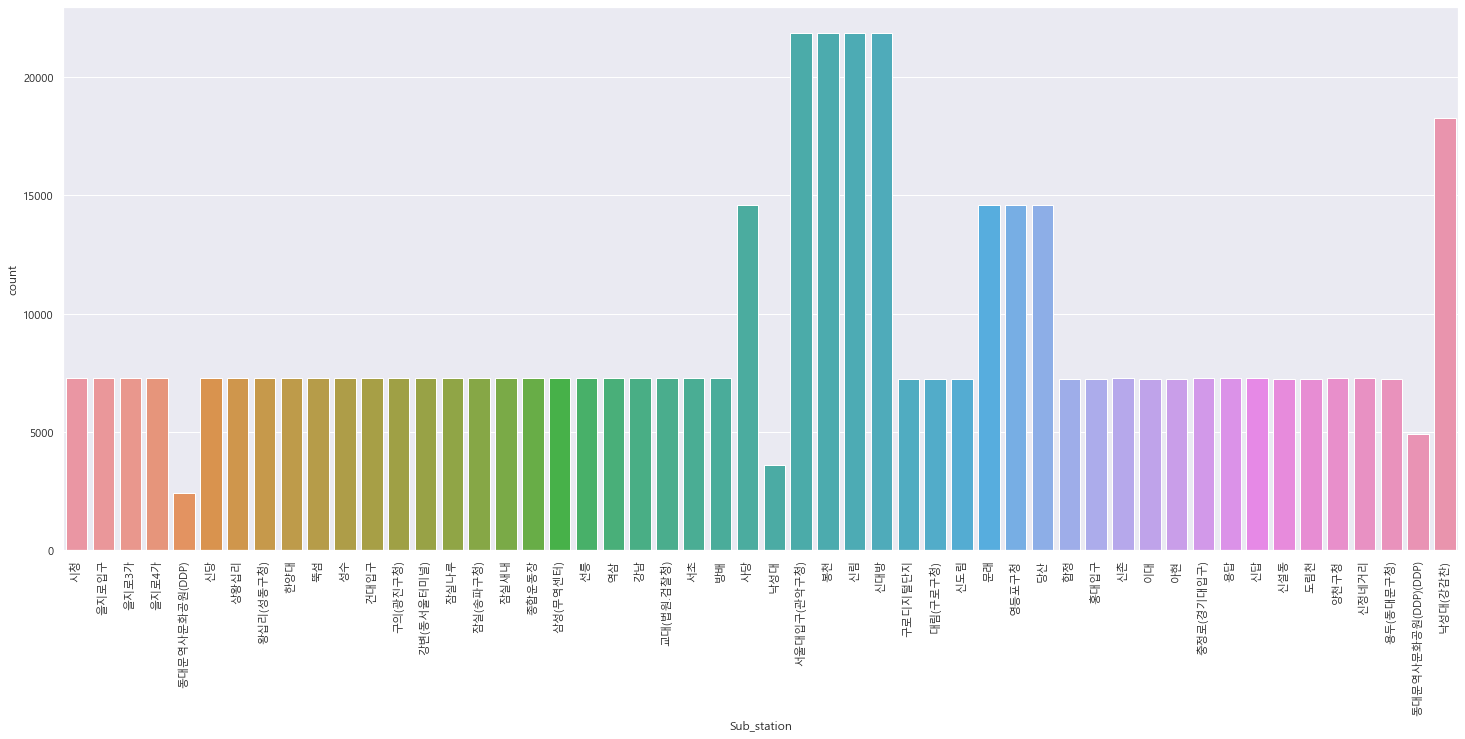

In [36]:
# 범주형 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.countplot(x='Sub_station', data=total_data)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

# 동대문역사문화공원(DDP)와 동대문역사문화공원(DDP)(DDP)는 합산되어야 한다. -> 재수정 필요
# 낙성대와 낙성대(강감찬)데이터는 합산되어야한다. -> 재수정 필요
# 사당, 서울대입구(관악구청), 봉천, 신림, 신대방, 문래, 영등포구청, 당산, 낙성대 값은 기상데이터와 합치는 과정에서 늘어난 것으로 보임 -> 재수정 필요


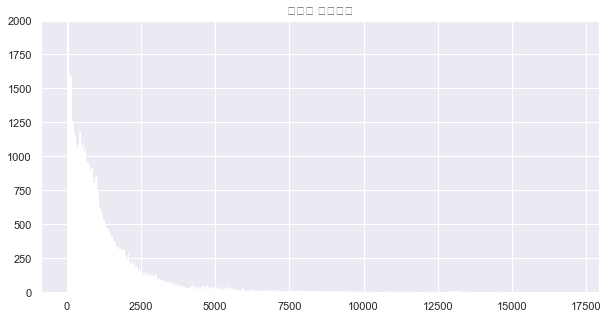

In [16]:
# 수치형 데이터 시각화
# 지하철 승차인원
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Passenger_num'], bins=5000)
ax.set_ylim(0, 2000)
ax.set_title('지하철 승차인원')
plt.show()

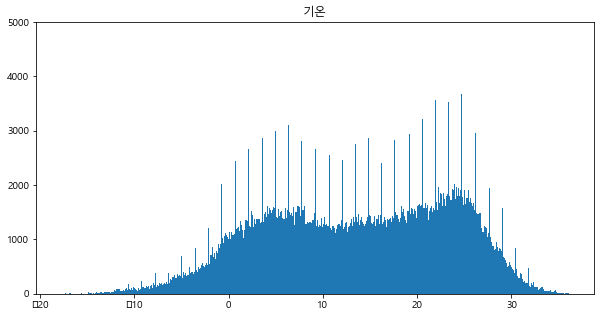

In [44]:
# 기온
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Temp'], bins=500)
ax.set_ylim(0, 5000)
ax.set_title('기온')
plt.show()

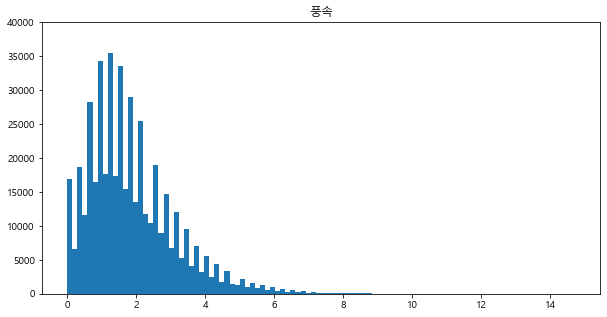

In [62]:
# 풍속
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Wind'], bins=100)
ax.set_ylim(0, 40000)
ax.set_title('풍속')
plt.show()

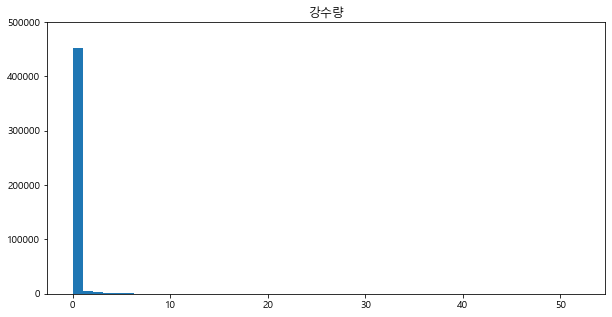

In [54]:
# 강수량
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Rain'], bins=50)
ax.set_ylim(0, 500000)
ax.set_title('강수량')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'lineplot'

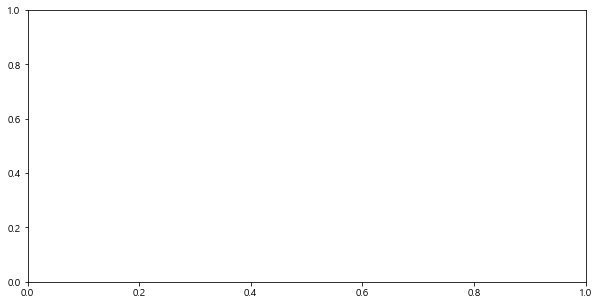

In [63]:
# 강수량
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(total_data['Rain'], bins=50)
ax.set_ylim(0, 500000)
ax.set_title('강수량')
plt.show()

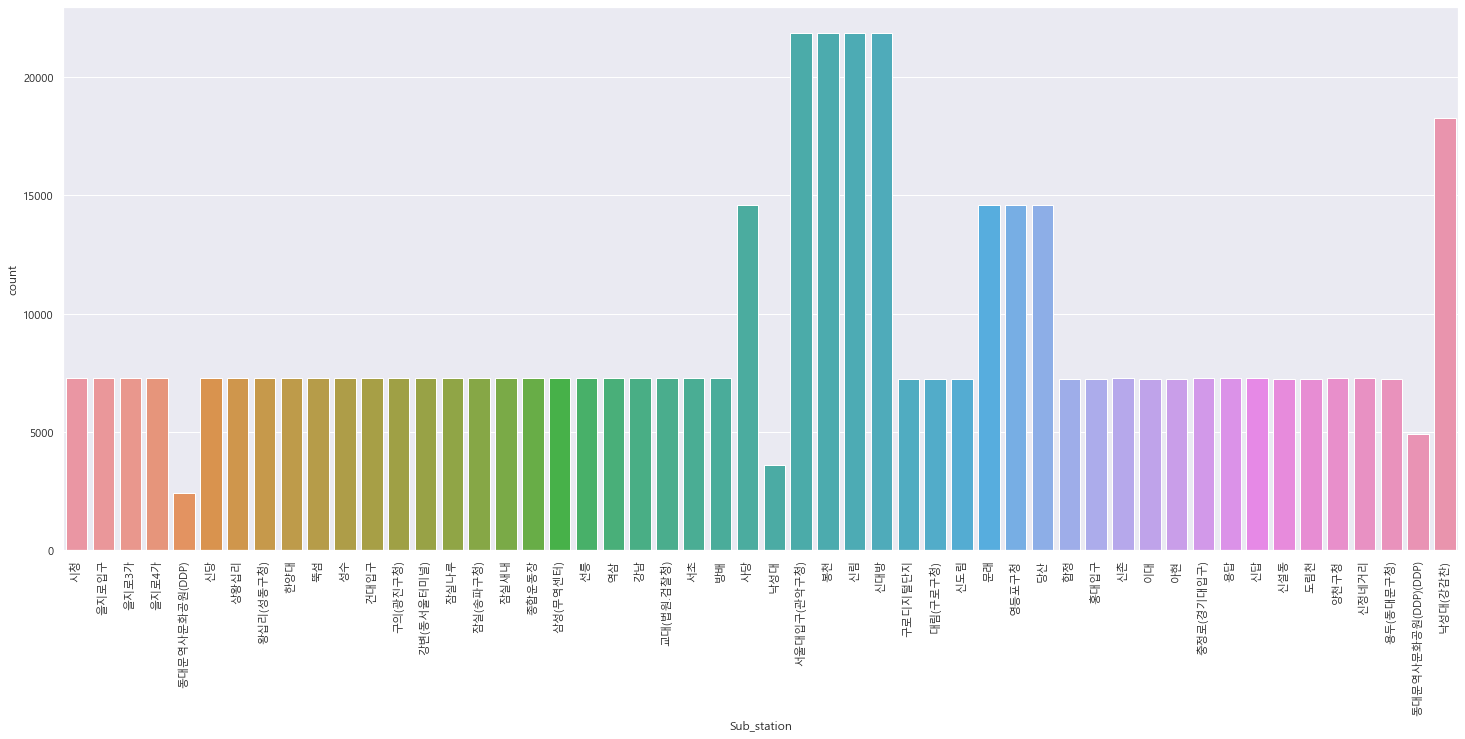

In [35]:
# 범주형 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.countplot(x='Sub_station', data=total_data)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

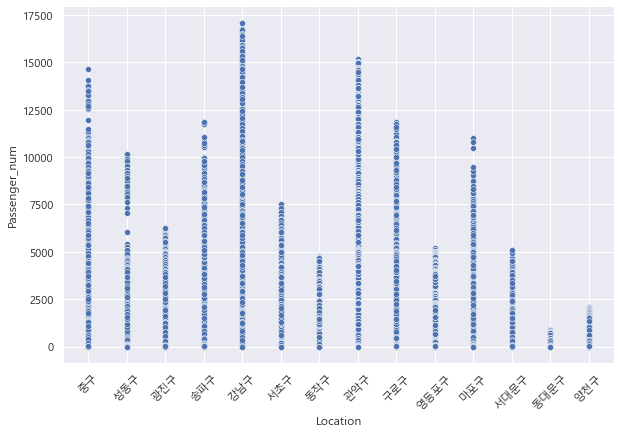

In [28]:
# 범주형 데이터 시각화
fig = sns.relplot(x='Location', y='Passenger_num', data=total_data)
fig.fig.set_size_inches(10, 6)
plt.xticks(rotation=45)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(x='Date', data=total_data)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

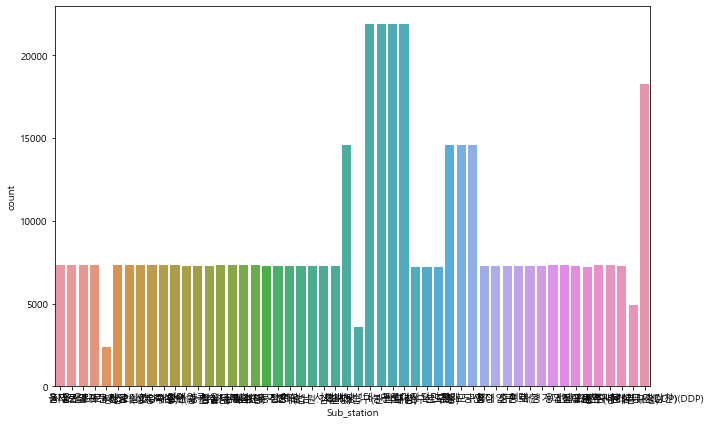

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(x='Sub_station', data=total_data)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.tight_layout()
plt.show()


In [ ]:
location = total_data[['위치']]
input_location = np.array(location)

sub_name = total_data[['역명']]
input_name = np.array(sub_name)

weather_temp = total_data[['기온(°C)']]
input_temp = np.array(weather_temp)

weather_wind = total_data[['풍속(m/s)']]
input_wind = np.array(weather_wind)

weather_rain = total_data[['강수량(mm)']]
input_rain = np.array(weather_rain)

total_data2 = total_data[['승차인원']]
passenger_num = np.array(total_data2)


# total_data1 = total_data[['위치','역명','기온(°C)','풍속(m/s)','강수량(mm)']]

In [ ]:
local_index = np.arange(len(input_location))

# plt.bar(local_index, passenger_num)      # 바 차트로 그려보기
# plt.xticks(local_index, input_location)  # 상관분석 히트맨 (씨본)
# plt.show()

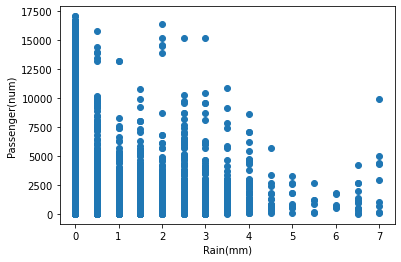

In [ ]:
plt.scatter(input_rain, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Rain(mm)')
plt.show()

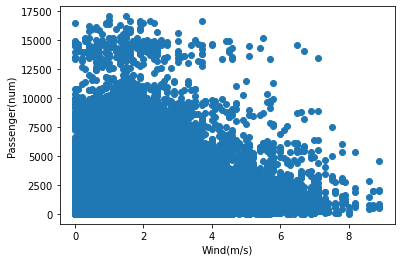

In [ ]:
plt.scatter(input_wind, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Wind(m/s)')
plt.show()

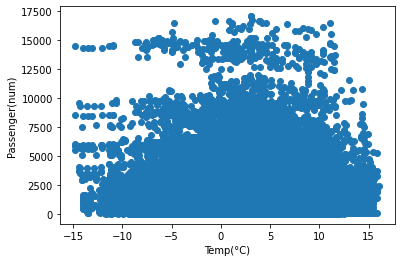

In [ ]:
plt.scatter(input_temp, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Temp(°C)')
plt.show()